In [1]:
import sys
sys.path.append('../..')
%load_ext autoreload
%autoreload 2

In [2]:
import spatialpy
import numpy
import matplotlib.pyplot as plt


In [3]:
class All(spatialpy.SubDomain):
    def inside(self, x, on_boundary):
        mask = x[0] < numpy.Inf
        return mask

class Top(spatialpy.SubDomain):
    def inside(self, x, on_boundary):
        mask = (x[1] <= 1.0) & (x[1] > 0.95)
        return mask

In [4]:
class Simple_Diffusion(spatialpy.Model):
    """ Initial condition is a delta function at and off-center point. 
        The solution should be a Gaussian, and periodic boundary conditions
        should allow it to wrap. """

    def __init__(self, model_name="simple_diffusion"):
        spatialpy.Model.__init__(self,model_name)
        
        # System constants
        D = 0.01

        # Define Species
        A = spatialpy.Species(name="A",diffusion_constant=D)
        self.add_species([A])

        # A unit square
        self.mesh = spatialpy.Mesh.create_2D_domain((0,1), (0,1), 40, 40, type_id=1, mass=1.0, nu = 1.0, fixed=True)

        # Define Subdomains
        self.add_subdomain(All(), 1) # total subdomain, type 1
        self.add_subdomain(Top(), 2) # top subdomains, type 2


        # Place the A molecules in the voxel nearest the center of the square
        self.add_initial_condition(
            spatialpy.PlaceInitialCondition(A,100000,[0,0,0])
        )

        self.timespan(numpy.linspace(0,5,1000))

In [5]:
# Creates the model object
model = Simple_Diffusion()

In [6]:
# You can access properties of the model object
# e.g., list the subdomain id's
model.listOfSubdomainIDs

[1, 2]

In [7]:
# Run the model object
%time result = model.run()

CPU times: user 16.7 s, sys: 215 ms, total: 16.9 s
Wall time: 1min 25s


In [8]:
#def display(result, species, timepoint, opacity=1.0, wireframe=True, width=500):
#    data = result.get_species(species,timepoint,concentration=True)
#    fun = pyurdme.DolfinFunctionWrapper(result.model.mesh.get_function_space())
#    vec = fun.vector()
#    nd = data.shape[0]
#    if nd == len(vec):
#        for i in range(nd):
#            vec[i]=data[i]
#    else:
#        v2d= result.get_v2d()
#        for i in range(len(vec)):
#            vec[i]=data[i]
#    fun.display(opacity=opacity, wireframe=wireframe, width=width)

In [9]:
#result.display('A',-1)

In [10]:
# Plot_step access the result object and search for the specified key to plot
def plot_step(key='type',index=0,time=0):
    pts, data = result.read_step(time)
    plt.figure(figsize=(15,10) )       
    if (key == 'v'):
        d = data[key]
        d = [d[i][index] for i in range(0,len(d))]
        print(len(d))
    else:
        d = data[key]
        print(len(d))
    plt.scatter(pts[:,0],pts[:,1],c=d)
    plt.axis('equal')
    plt.colorbar()
    plt.title('t={0}'.format(time))
    
def plot_all(key='type'):
    for i,t in enumerate(result.get_timespan()):
        plot_step(i,key)

1600


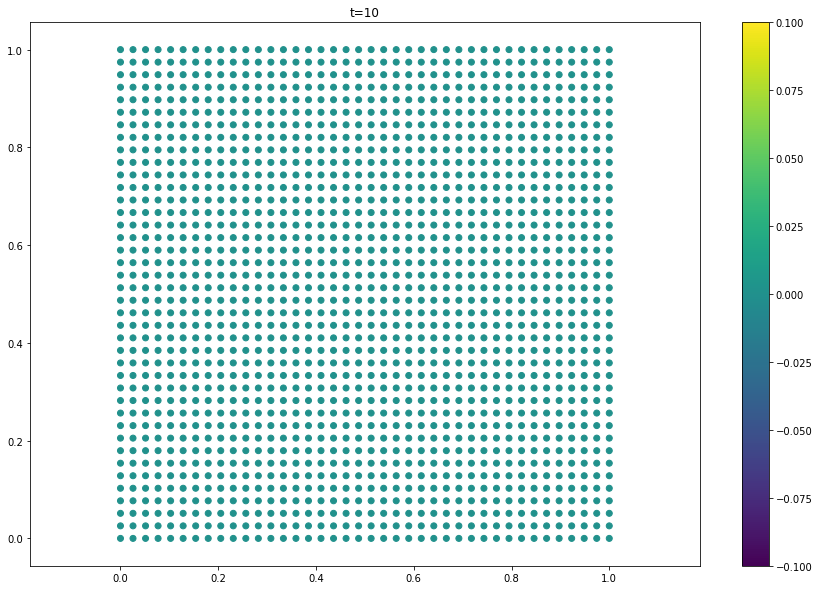

In [11]:
# Plot velocity (index 0, i.e., vx) at timestep 10
plot_step('v',index=0,time=10)

1600


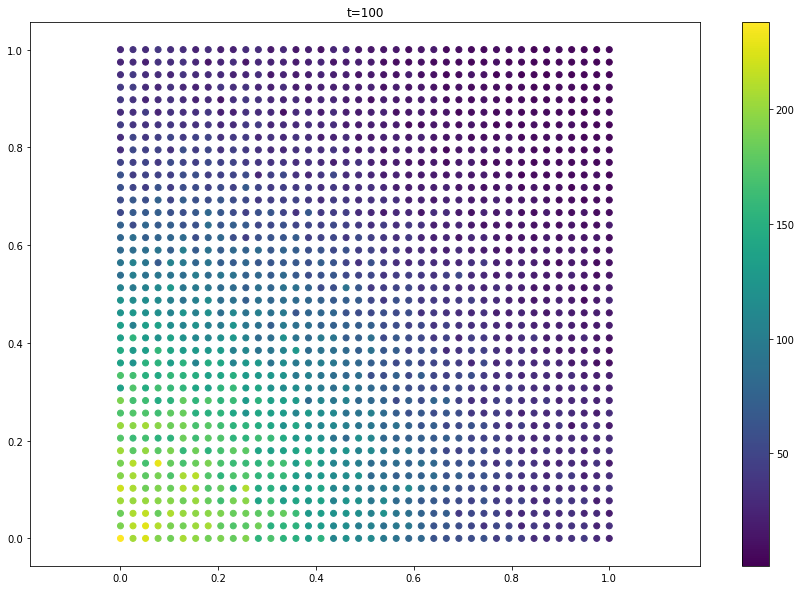

In [12]:
# Plot concentration of species A (discrete) at timestep 100
plot_step('D[A]',time=100)

In [13]:
# To access data from a given timestep, use the read_step method
# e.g., read data from time step 10
pts,data = result.read_step(10)
print(pts)
print(data)

[[0.         0.         0.        ]
 [0.         0.02564103 0.        ]
 [0.         0.05128205 0.        ]
 ...
 [1.         0.94871795 0.        ]
 [1.         0.974359   0.        ]
 [1.         1.         0.        ]]
{'id': array([   0,    1,    2, ..., 1597, 1598, 1599]), 'type': array([1, 1, 1, ..., 1, 2, 2]), 'v': array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]), 'rho': array([1600., 1600., 1600., ..., 1600., 1600., 1600.]), 'mass': array([1., 1., 1., ..., 1., 1., 1.]), 'bvf_phi': array([0., 0., 0., ..., 0., 0., 0.]), 'nu': array([1., 1., 1., ..., 1., 1., 1.]), 'C[A]': array([0., 0., 0., ..., 0., 0., 0.]), 'D[A]': array([2190, 2030, 1923, ...,    0,    0,    0])}
